# Basic Introduction to RNA Sequencing Data Analysis

## 1. Sequencing the Sample Using Modern Technology

In contemporary RNA sequencing, Illumina stands at the forefront of technology. Today, we will delve into the analysis of bulk sequencing data.

## 2. Alignment to Reference Sequence

Upon obtaining sequencing files, the next step involves aligning them to the reference sequence of the organism. This crucial step sets the foundation for downstream analysis.

## 3. Exploration of Gene Counts

Following alignment, a plethora of information becomes available. However, our focus today will be on the analysis of gene counts. Understanding gene expression levels provides valuable insights into biological processes.

Let's dive into the fascinating world of RNA sequencing data analysis!


# Some important Questions before the analysis

### 1. What are we doing today? 
### 2. Why we do this?
### 3. What is medulloblastoma?

#

#

# We will be working with Medulloblastoma Data from the published paper:
## In silico analysis of long non-coding RNAs in medulloblastoma and its subgroups: https://www.sciencedirect.com/science/article/pii/S0969996120301480

In [1]:
#%pip install pydeseq2
#%pip install scanpy
#%pip install bioinfokit
#%pip install gseapy

In [2]:
## These are the packages we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import scanpy as sc
import seaborn as sns
import gseapy as gp
from gseapy.plot import barplot, dotplot

In [3]:
G3_G4 = pd.read_csv("G3vsG4.csv", index_col=0)
counts_df = G3_G4.T
G3_G4.head()

,DMB006,MB002,MB511H,RCMB28,RCMB38,RCMB40,RCMB45,RCMB51
ENSG00000268020.3|OR4G4P,0.0,0.0,0.0,1.0,3.0,0.0,1.0,3.0
ENSG00000290826.1|ENSG00000290826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
ENSG00000240361.3|OR4G11P,0.0,0.0,1.0,0.0,1.0,0.0,7.0,4.0
ENSG00000186092.7|OR4F5,0.0,0.0,0.0,1.0,4.0,0.0,3.0,9.0
ENSG00000223972.6|DDX11L1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
meta = pd.read_csv("G3vsG4_Info.csv", index_col=0)
meta.head()

,GROUP
DMB006,GROUP4
MB002,GROUP3
MB511H,GROUP3
RCMB28,GROUP3
RCMB38,GROUP4


In [5]:
print(f" Dimension before filter:{(counts_df.shape)}")
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]
print(f" Dimension after filter:{(counts_df.shape)}")

 Dimension before filter:(8, 62696)
 Dimension after filter:(8, 41085)


In [6]:
inference = DefaultInference(n_cpus=8)
# We are creating Deseq input from our table
dds = DeseqDataSet(
    counts=counts_df,
    metadata=meta,
    design_factors="GROUP",
    refit_cooks=True,
    inference=inference,
)

In [7]:
dds.X

array([[  0,   0,   0, ...,   1,  79,  42],
       [  0,   0,  30, ...,   0,   0,   3],
       [  1,   0,  19, ...,   1, 124,  79],
       ...,
       [  0,   0,   1, ...,   0,   2,   4],
       [  7,   3,  31, ...,   3,   2,   3],
       [  4,   9, 122, ...,   0,   1,   3]])

In [8]:
dds.var

""
ENSG00000240361.3|OR4G11P
ENSG00000186092.7|OR4F5
ENSG00000237613.2|FAM138A
ENSG00000290825.1|DDX11L2
ENSG00000227232.5|WASH7P
...
ENSG00000224931.4|ENSG00000224931
ENSG00000214897.5|PNMA6E
ENSG00000215603.4|ZNF92P1Y
ENSG00000229129.1|ACTG1P2


In [9]:
dds.obs

,GROUP
DMB006,GROUP4
MB002,GROUP3
MB511H,GROUP3
RCMB28,GROUP3
RCMB38,GROUP4
RCMB40,GROUP3
RCMB45,GROUP4
RCMB51,GROUP4


# Now we will run Deseq2
### Corresponding Paper: https://academic.oup.com/bioinformatics/article/39/9/btad547/7260507

In [10]:
# Now we will run DeSeq2
dds.deseq2()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 4.18 seconds.

Fitting dispersion trend curve...
... done in 0.72 seconds.

Fitting MAP dispersions...
... done in 4.86 seconds.

Fitting LFCs...
... done in 3.58 seconds.

Replacing 0 outlier genes.



In [11]:
print(dds)

AnnData object with n_obs × n_vars = 8 × 41085
    obs: 'GROUP'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'


In [12]:
stat_res = DeseqStats(dds, inference=inference)

In [13]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: GROUP GROUP4 vs GROUP3
                                      baseMean  log2FoldChange     lfcSE  \
ENSG00000240361.3|OR4G11P             2.124741        3.968457  2.309559   
ENSG00000186092.7|OR4F5               2.414594        4.154534  2.131690   
ENSG00000237613.2|FAM138A            26.356030        1.783736  1.458954   
ENSG00000290825.1|DDX11L2            30.019692        1.187616  0.675127   
ENSG00000227232.5|WASH7P           1240.323466        0.052669  0.298567   
...                                        ...             ...       ...   
ENSG00000224931.4|ENSG00000224931     1.921842        2.891940  1.795874   
ENSG00000214897.5|PNMA6E            102.524284       -5.448839  2.674592   
ENSG00000215603.4|ZNF92P1Y            1.611297        2.718456  1.926069   
ENSG00000229129.1|ACTG1P2            20.398035       -0.109186  2.114953   
ENSG00000229465.1|ACTG1P11           13.306343       -0.331612  1.604176   

                          

... done in 1.96 seconds.



In [14]:
Stat = stat_res.results_df

In [15]:
# Now we will remove all the gene that has low count i.e baseMean <10
print(f" Dimension before filter:{(Stat.shape)}")
Stat = Stat[Stat.baseMean >= 10]
print(f" Dimension before filter:{(Stat.shape)}")

 Dimension before filter:(41085, 6)
 Dimension before filter:(26527, 6)


In [16]:
# We can get Differentially expressed gene
sig = Stat[(Stat.padj < 0.05)&(abs(Stat.log2FoldChange) > 0.5)]
print(f" Dimension after Extracting differentially expressed Genes:{(sig.shape )}")

 Dimension after Extracting differentially expressed Genes:(2831, 6)


# Understanding Differentially Expressed Genes (DEGs)

## What Are Differentially Expressed Genes?
Differentially Expressed Genes (DEGs) are genes whose expression levels vary significantly between different experimental conditions, such as different tissues, treatments, or disease states. Identifying DEGs is crucial for understanding the molecular mechanisms underlying biological processes and disease pathology.

# Deciphering Statistical Significance: P-value and Adjusted P-value

## What is P-value?
The P-value is a statistical measure that quantifies the probability of observing the observed data or more extreme results under the assumption that the null hypothesis is true. In the context of RNA sequencing analysis, the null hypothesis typically states that there is no difference in gene expression between experimental conditions. A low P-value indicates strong evidence against the null hypothesis, suggesting that the observed differences in gene expression are unlikely to occur by chance alone.

## What is Adjusted P-value? Why is it Done?
The adjusted P-value, also known as the false discovery rate (FDR), accounts for multiple hypothesis testing when analyzing large-scale genomic data, such as RNA sequencing data. Multiple hypothesis testing increases the likelihood of observing false positives (Type I errors). Adjusting the P-value helps control the false discovery rate by accounting for the number of tests performed and provides a more stringent criterion for identifying statistically significant results. This adjustment is crucial to reduce the number of false positives and ensure the reliability of the findings in genomic studies.

Understanding DEGs, P-values, and adjusted P-values is essential for robust interpretation of RNA sequencing data and gaining insights into the biological significance of gene expression changes.


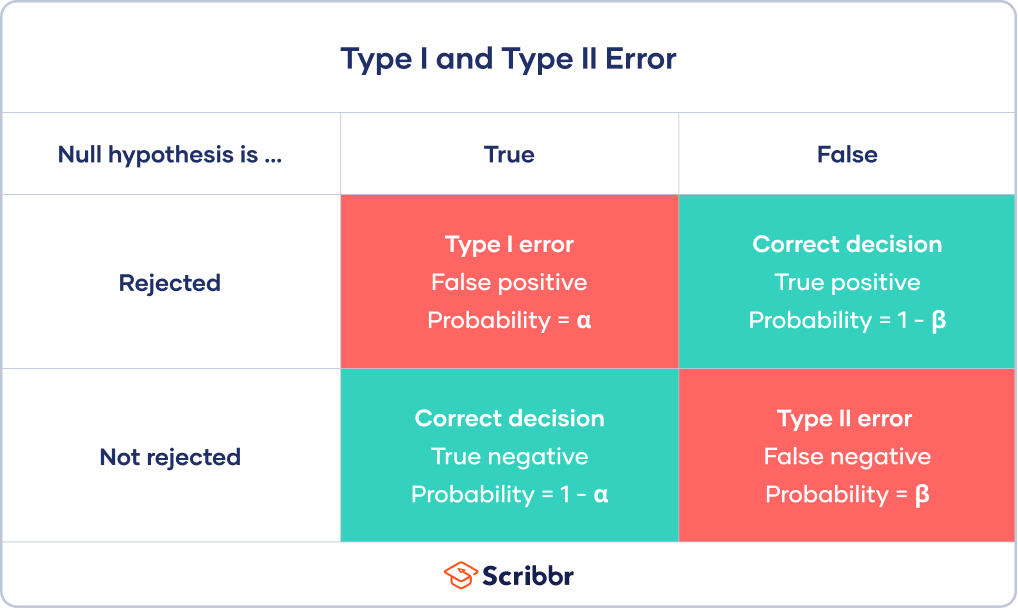

In [17]:
sig

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000278267.1|MIR6859-1,35.565366,1.004121,0.344249,2.916847,0.003536,0.039026
ENSG00000187961.15|KLHL17,1127.868680,-1.897074,0.511785,-3.706778,0.000210,0.005704
ENSG00000231702.2|ENSG00000231702,194.429375,-2.437400,0.563676,-4.324114,0.000015,0.000937
ENSG00000188976.11|NOC2L,4711.386876,-1.599543,0.415397,-3.850634,0.000118,0.003918
ENSG00000176022.7|B3GALT6,956.714044,-0.831884,0.252026,-3.300783,0.000964,0.016326
...,...,...,...,...,...,...
ENSG00000196433.13_PAR_Y|ASMT,13.306487,-6.213461,2.222422,-2.795806,0.005177,0.049922
ENSG00000197976.12_PAR_Y|AKAP17A,866.291160,-0.942312,0.303881,-3.100927,0.001929,0.026083
ENSG00000235001.3|EIF4A1P2,889.015804,-1.754153,0.513467,-3.416291,0.000635,0.012239
ENSG00000229236.3|TTTY10,44.963065,2.582375,0.816438,3.162977,0.001562,0.022775


# Now Let's do the fun part:  Downstream Analysis

C:\Users\17867\AppData\Roaming\Python\Python311\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


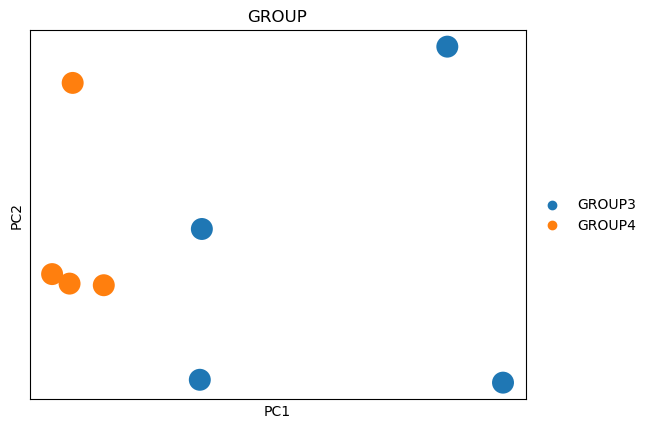

In [18]:
# PCA analysis
sc.tl.pca(dds)
sc.pl.pca(dds, color='GROUP', size=1000)

In [19]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [20]:
dds_sub = dds[:, sig.index] #getting only differentially expressed genes

In [21]:
diff_exp = pd.DataFrame(dds_sub.layers['log1p'].T,index = dds_sub.var_names, columns = dds_sub.obs_names)

In [22]:
diff_exp.head()

,DMB006,MB002,MB511H,RCMB28,RCMB38,RCMB40,RCMB45,RCMB51
ENSG00000278267.1|MIR6859-1,4.083091,3.111817,3.444534,3.225070,3.845774,2.968984,3.808116,3.759246
ENSG00000187961.15|KLHL17,6.332653,7.980633,7.624388,6.386564,6.120096,7.347097,6.269387,5.909263
ENSG00000231702.2|ENSG00000231702,4.098823,5.987559,6.293387,4.881600,3.422045,5.505326,4.241992,4.451132
ENSG00000188976.11|NOC2L,7.825062,9.192033,9.074036,8.015813,7.594729,8.820337,7.829125,7.763344
ENSG00000176022.7|B3GALT6,6.746962,7.296756,7.102340,7.027530,6.462689,6.992933,6.253815,6.610701


# Now we will create Heatmap of the Differentially expressed genes and we will see something really interesting happening

C:\Users\17867\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\17867\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


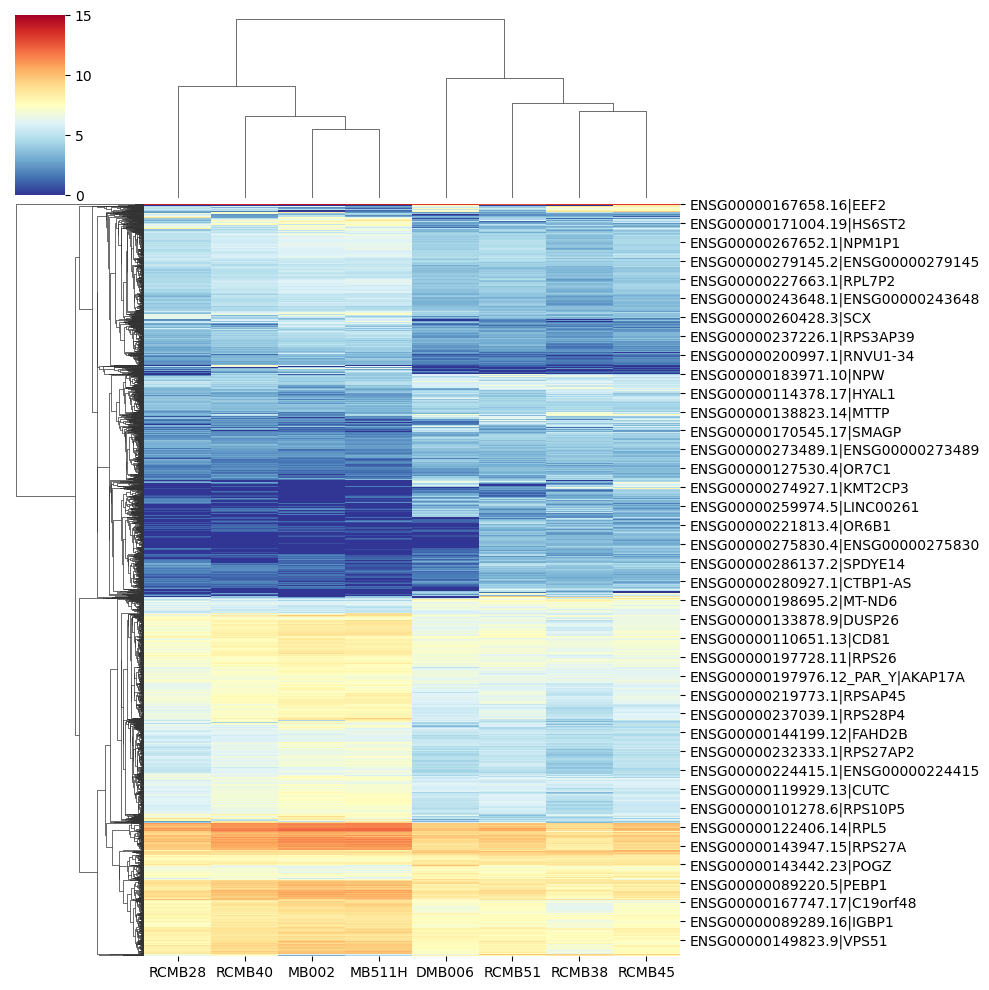

In [23]:
sns.clustermap(diff_exp, cmap = 'RdYlBu_r' );

In [24]:
print(meta[meta['GROUP']=='GROUP3'])
print(meta[meta['GROUP']=='GROUP4'])

         GROUP
MB002   GROUP3
MB511H  GROUP3
RCMB28  GROUP3
RCMB40  GROUP3
         GROUP
DMB006  GROUP4
RCMB38  GROUP4
RCMB45  GROUP4
RCMB51  GROUP4


In [25]:
sig.columns

Index(['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj'], dtype='object')

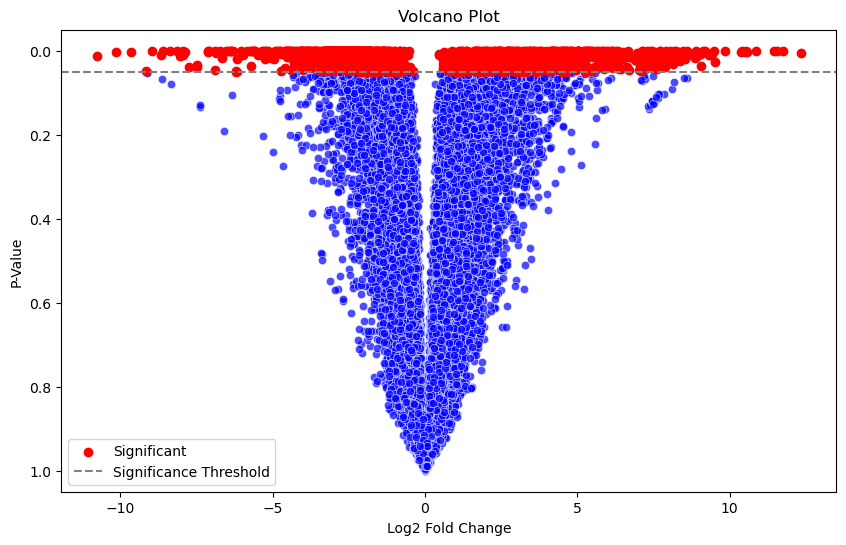

In [26]:
significance_threshold = 0.05

# Create a volcano plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log2FoldChange', y='padj', data=Stat, color='blue', alpha=0.7)

# Highlight significant points
plt.scatter(Stat[Stat['padj'] < significance_threshold]['log2FoldChange'],
            Stat[Stat['padj'] < significance_threshold]['padj'],
            color='red', marker='o', label='Significant')

# Add labels and title
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('P-Value')

# Add a horizontal line at the significance threshold
plt.axhline(y=significance_threshold, color='gray', linestyle='--', label='Significance Threshold')
plt.gca().invert_yaxis()
# Customize legend
plt.legend()

In [27]:
diff_exp_genes =[entry.split("|")[1] for entry in sig.index]

In [28]:
diff_exp

,DMB006,MB002,MB511H,RCMB28,RCMB38,RCMB40,RCMB45,RCMB51
ENSG00000278267.1|MIR6859-1,4.083091,3.111817,3.444534,3.225070,3.845774,2.968984,3.808116,3.759246
ENSG00000187961.15|KLHL17,6.332653,7.980633,7.624388,6.386564,6.120096,7.347097,6.269387,5.909263
ENSG00000231702.2|ENSG00000231702,4.098823,5.987559,6.293387,4.881600,3.422045,5.505326,4.241992,4.451132
ENSG00000188976.11|NOC2L,7.825062,9.192033,9.074036,8.015813,7.594729,8.820337,7.829125,7.763344
ENSG00000176022.7|B3GALT6,6.746962,7.296756,7.102340,7.027530,6.462689,6.992933,6.253815,6.610701
...,...,...,...,...,...,...,...,...
ENSG00000196433.13_PAR_Y|ASMT,0.000000,4.491239,2.446608,1.951443,0.000000,0.000000,0.967764,0.000000
ENSG00000197976.12_PAR_Y|AKAP17A,6.602170,7.241948,7.021552,6.655428,6.099152,7.145804,6.332260,6.446724
ENSG00000235001.3|EIF4A1P2,5.750287,7.364446,7.638139,6.369469,5.569490,7.131138,6.505051,5.956539
ENSG00000229236.3|TTTY10,4.574297,3.361100,1.725483,2.778639,3.173772,1.586960,4.879496,4.092023


<Axes: title={'center': 'GO Biological Processes'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

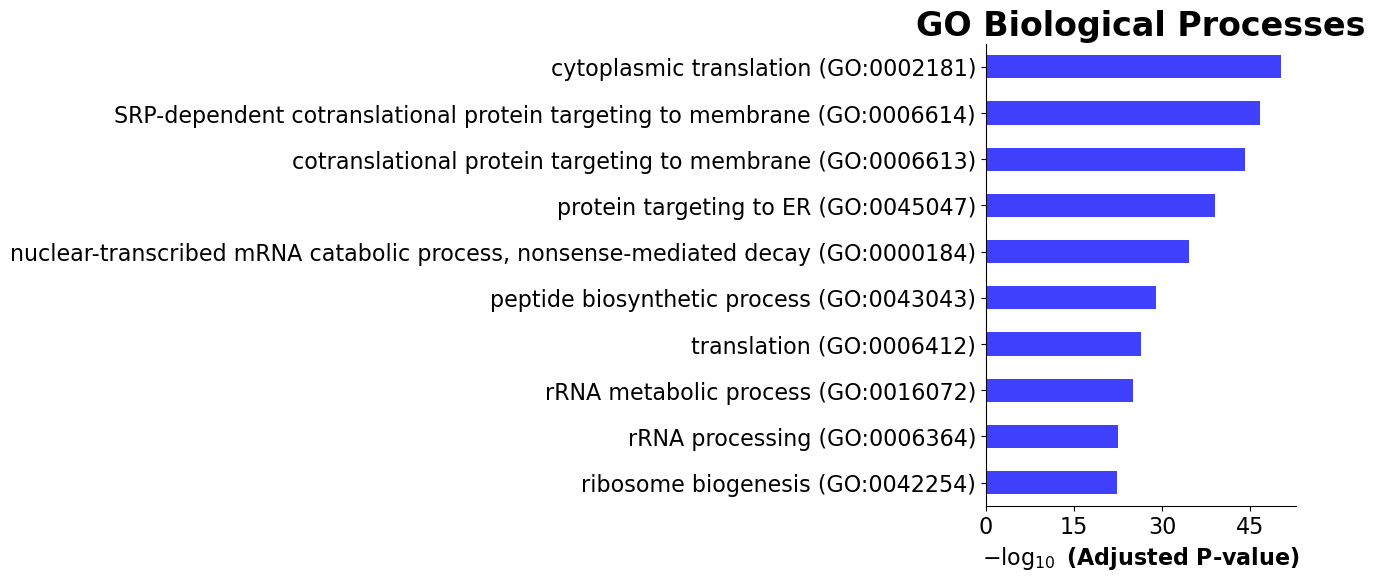

In [29]:
enr_GOBP_up = gp.enrichr(gene_list=diff_exp_genes ,
 gene_sets=['GO_Biological_Process_2021'],
 organism='Human', 
 #description='DEGs_up_1d',
 outdir='test/enr_DEGs_GOBP_up',
 cutoff=0.5 
 )
barplot(enr_GOBP_up.res2d,title='GO Biological Processes',color = 'b')

<Axes: title={'center': 'GO Molecular Function'}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

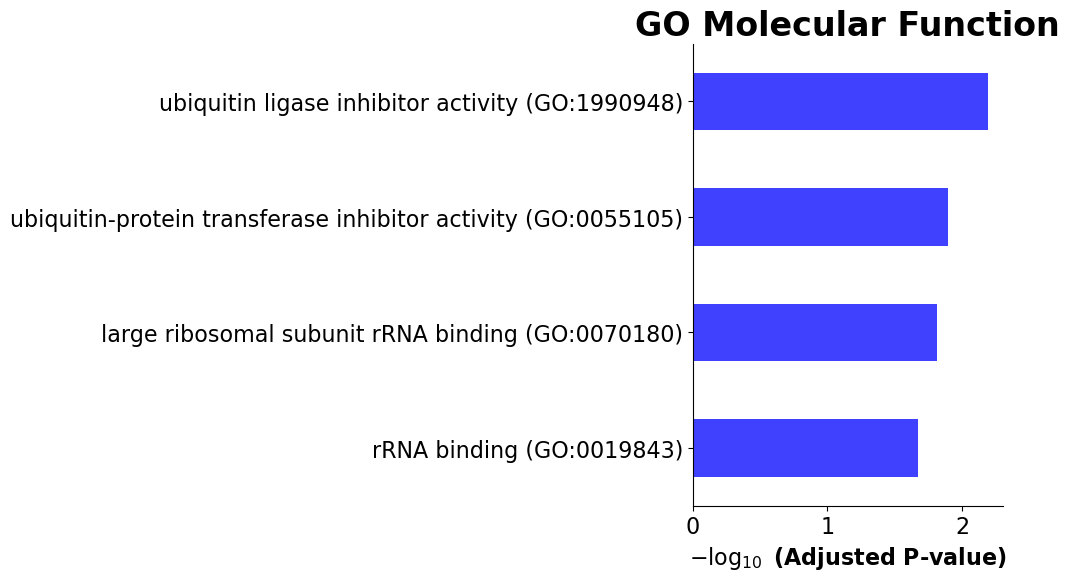

In [30]:
enr_GOMF_down = gp.enrichr(gene_list=diff_exp_genes ,
 gene_sets=['GO_Molecular_Function_2021'],
 organism='Human', 
 #description='DEGs_down_1d',
 outdir='test/enr_DEGs_GOMF_down',
 cutoff=0.5 
 )
barplot(enr_GOMF_down.res2d,title='GO Molecular Function',color = 'b')

<Axes: title={'center': 'GO Cellular Component '}, xlabel='$- \\log_{10}$ (Adjusted P-value)'>

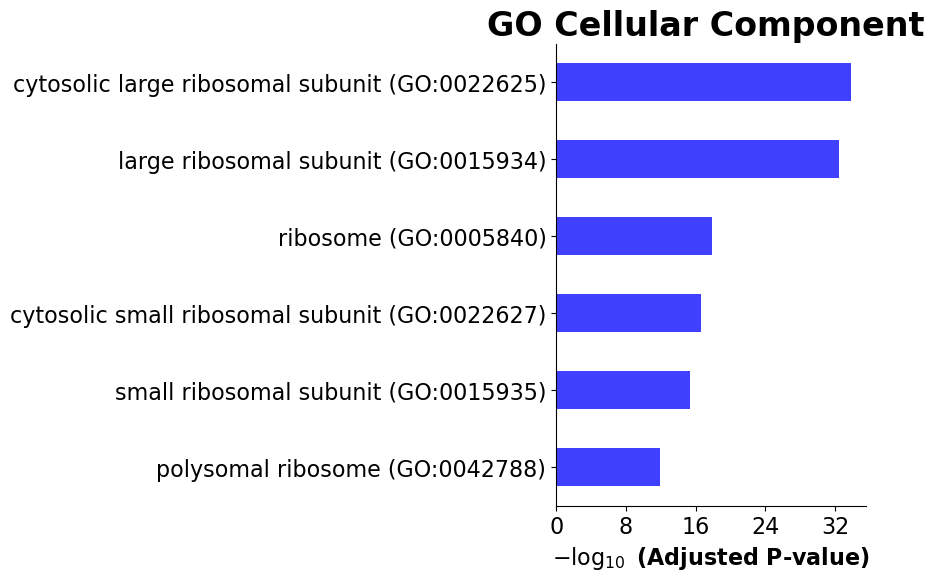

In [31]:
enr_GOCC_down = gp.enrichr(gene_list=diff_exp_genes ,
 gene_sets=['GO_Cellular_Component_2021'],
 organism='Human', 
 #description='DEGs_down_1d',
 outdir='test/enr_DEGs_GOCC_down',
 cutoff=0.5 
 )
barplot(enr_GOCC_down.res2d,title='GO Cellular Component ',color = 'b')